In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Specify the model to be used, let's go with MPII first 
COCO and MPII are body pose estimation model. COCO has 18 points and MPI has 15 points as output.


In [9]:
protoFile = "pose/mpi/pose_deploy_linevec_faster_4_stages.prototxt"
weightsFile = "pose/mpi/pose_iter_160000.caffemodel"
nPoints = 15
POSE_PAIRS = [[0,1], [1,2], [2,3], [3,4], [1,5], [5,6], [6,7], [1,14], [14,8], [8,9], [9,10], [14,11], [11,12], [12,13] ]
colors = [ [255,255,0],[0,100,255], [0,255,255], [0,100,255],[0,100,255], [0,255,255], [0,100,255],
     [0,255,0], [255,200,100], [255,0,255], [0,255,0], [255,200,100], [255,0,255],
     [0,255,0]]

### Load the network and specify the image dimensions

In [10]:
net = cv2.dnn.readNetFromCaffe(protoFile, weightsFile)

inWidth = 368
inHeight = 368

### Find the keypoints for a image with only single person

In [11]:
frame = cv2.imread("single.jpeg")
frameCopy = np.copy(frame)
frameWidth = frame.shape[1]
frameHeight = frame.shape[0]
threshold = 0.1

### Pass it through the network

In [12]:
inpBlob = cv2.dnn.blobFromImage(frame, 1.0 / 255, (inWidth, inHeight),
                          (0, 0, 0), swapRB=False, crop=False)

net.setInput(inpBlob)

output = net.forward()
H = output.shape[2]
W = output.shape[3]

### Gather the points and plot the keypoints and the skeleton figure

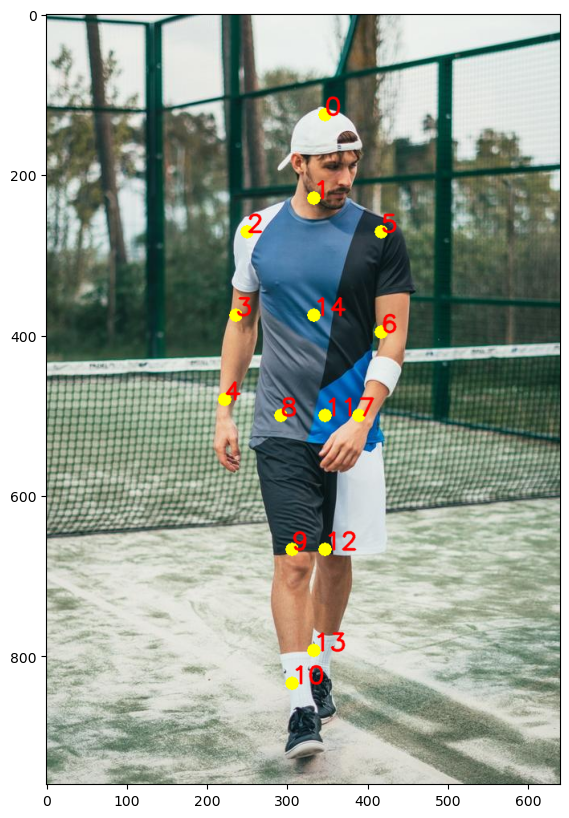

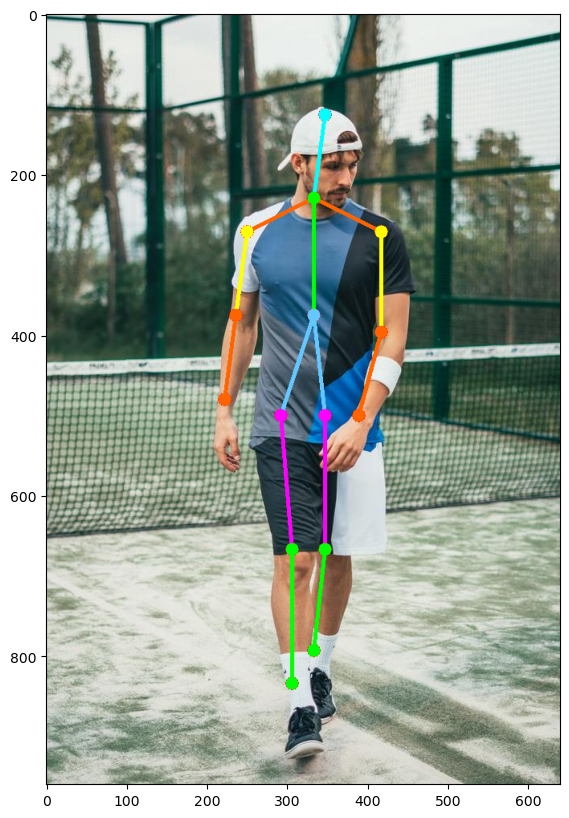

In [13]:
# Empty list to store the detected keypoints
points = []


for i in range(nPoints):
    # confidence map of corresponding body's part.
    probMap = output[0, i, :, :]

    # Find global maxima of the probMap.
    minVal, prob, minLoc, point = cv2.minMaxLoc(probMap)
    
    # Scale the point to fit on the original image
    x = (frameWidth * point[0]) / W
    y = (frameHeight * point[1]) / H

    if prob > threshold : 
        cv2.circle(frameCopy, (int(x), int(y)), 8, (0, 255, 255), thickness=-1, lineType=cv2.FILLED)
        cv2.putText(frameCopy, "{}".format(i), (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, lineType=cv2.LINE_AA)
        cv2.circle(frame, (int(x), int(y)), 8, (0, 0, 255), thickness=-1, lineType=cv2.FILLED)

        # Add the point to the list if the probability is greater than the threshold
        points.append((int(x), int(y)))
    else :
        points.append(None)

# Draw Skeleton
for pair in POSE_PAIRS:
    partA = pair[0]
    partB = pair[1]

    if points[partA] and points[partB]:
        #cv2.line(frame, points[partA], points[partB], (0,255,255), 3)
        cv2.line(frame, points[partA], points[partB], colors[POSE_PAIRS.index(pair)], 3)
        cv2.circle(frame, points[partA], 8, colors[POSE_PAIRS.index(pair)], thickness=-1)
        cv2.circle(frame, points[partB], 8, colors[POSE_PAIRS.index(pair)], thickness=-1)

plt.figure(figsize=[10,10])
plt.imshow(cv2.cvtColor(frameCopy, cv2.COLOR_BGR2RGB))
plt.figure(figsize=[10,10])
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

### Now, repeating the same exact previous steps but using a COCO model

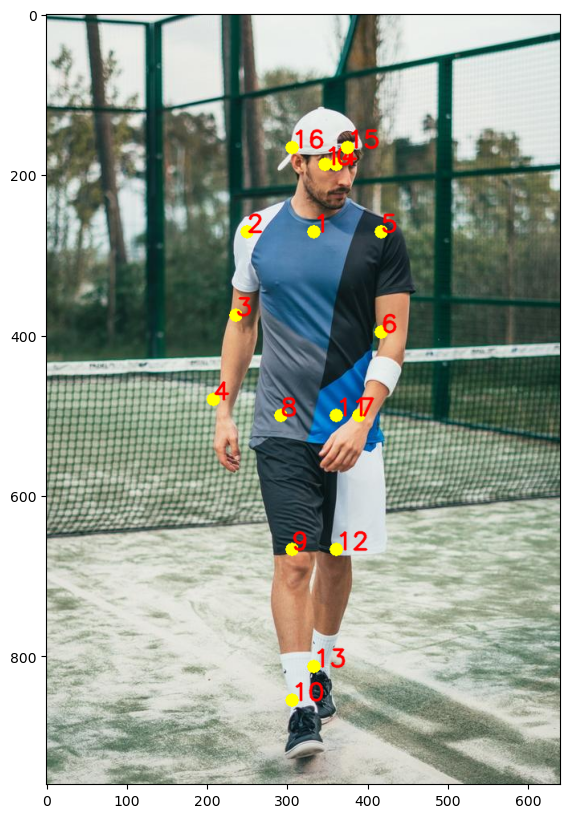

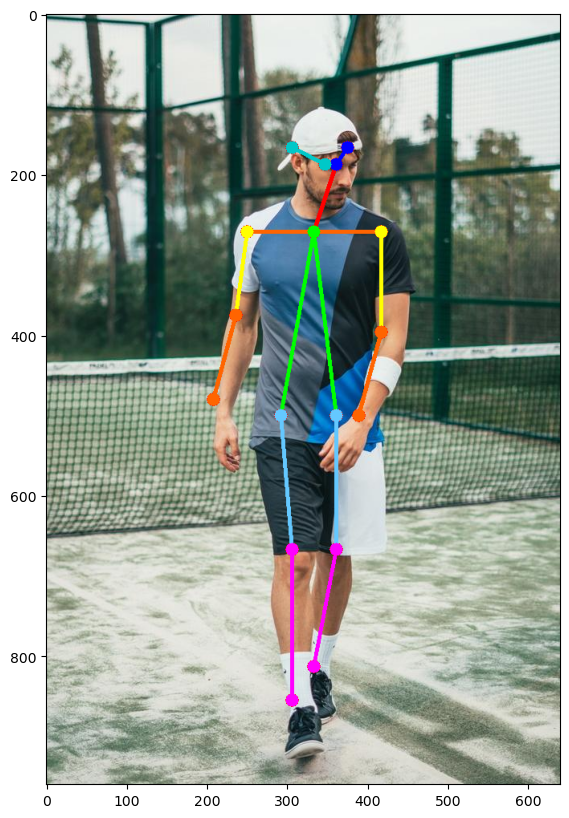

In [14]:
protoFile = "pose/coco/pose_deploy_linevec.prototxt"
weightsFile = "pose/coco/pose_iter_440000.caffemodel"
nPoints = 18
POSE_PAIRS = [ [1,0],[1,2],[1,5],[2,3],[3,4],[5,6],[6,7],[1,8],[8,9],[9,10],[1,11],[11,12],[12,13],[0,14],[0,15],[14,16],[15,17]]
colors = [ [0,0,255],[0,100,255], [0,100,255], [0,255,255], [0,100,255], [0,255,255], [0,100,255],
     [0,255,0], [255,200,100], [255,0,255], [0,255,0], [255,200,100], [255,0,255],
     [255,0,0], [255,0,0],[200,200,0],[0,0,0]]

net = cv2.dnn.readNetFromCaffe(protoFile, weightsFile)

inWidth = 368
inHeight = 368

frame = cv2.imread("single.jpeg")
frameCopy = np.copy(frame)
frameWidth = frame.shape[1]
frameHeight = frame.shape[0]
threshold = 0.1

inpBlob = cv2.dnn.blobFromImage(frame, 1.0 / 255, (inWidth, inHeight),
                          (0, 0, 0), swapRB=False, crop=False)

net.setInput(inpBlob)

output = net.forward()
H = output.shape[2]
W = output.shape[3]

# Empty list to store the detected keypoints
points = []


for i in range(nPoints):
    # confidence map of corresponding body's part.
    probMap = output[0, i, :, :]

    # Find global maxima of the probMap.
    minVal, prob, minLoc, point = cv2.minMaxLoc(probMap)
    
    # Scale the point to fit on the original image
    x = (frameWidth * point[0]) / W
    y = (frameHeight * point[1]) / H

    if prob > threshold : 
        cv2.circle(frameCopy, (int(x), int(y)), 8, (0, 255, 255), thickness=-1, lineType=cv2.FILLED)
        cv2.putText(frameCopy, "{}".format(i), (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, lineType=cv2.LINE_AA)
        cv2.circle(frame, (int(x), int(y)), 8, (0, 0, 255), thickness=-1, lineType=cv2.FILLED)

        # Add the point to the list if the probability is greater than the threshold
        points.append((int(x), int(y)))
    else :
        points.append(None)

# Draw Skeleton
for pair in POSE_PAIRS:
    partA = pair[0]
    partB = pair[1]

    if points[partA] and points[partB]:
        #cv2.line(frame, points[partA], points[partB], (0,255,255), 3)
        cv2.line(frame, points[partA], points[partB], colors[POSE_PAIRS.index(pair)], 3)
        cv2.circle(frame, points[partA], 8, colors[POSE_PAIRS.index(pair)], thickness=-1)
        cv2.circle(frame, points[partB], 8, colors[POSE_PAIRS.index(pair)], thickness=-1)

plt.figure(figsize=[10,10])
plt.imshow(cv2.cvtColor(frameCopy, cv2.COLOR_BGR2RGB))
plt.figure(figsize=[10,10])
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))